In [1]:
import numpy as np
import corner
import emcee
import matplotlib.pyplot as plt

In [2]:
read = emcee.backends.HDFBackend("jam_axi_rms.h5")

In [3]:
#Get all chains of Emcee.
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

chain = read.get_chain()   

In [4]:
#Get all log_probabilities
#Frist input is the iteration, and second the walker number, e.g., 
#chain[10][13] get the walker number 13 in the 10 iteration.

log_prob = read.get_log_prob()
print(np.where(log_prob == log_prob.max()))
print(log_prob.max())

(array([27935, 27936, 27937, 27938, 27939, 27940, 27941, 27942, 27943,
       27944, 27945, 27946, 27947, 27948, 27949, 27950, 27951, 27952]), array([17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17,
       17]))
-11.529658523207177


In [5]:
#Get the number of accepted values
#E.g, accepted[10] = 2, means walker 10 was accepted 2 times

accepted = read.accepted
print("Number of accepted walkers:",np.count_nonzero(accepted))
accepted

Number of accepted walkers: 120


array([6884., 7047., 6945., 7000., 6877., 7074., 6876., 6942., 6944.,
       6765., 6964., 6972., 7284., 7219., 7184., 7165., 7079., 6783.,
       6819., 6827., 6721., 6926., 7105., 7189., 7030., 7040., 6853.,
       6902., 7146., 7152., 6991., 7116., 7115., 6887.,  324., 7408.,
       7187., 6906., 6954., 7016., 7319., 7354., 7004., 7075., 6796.,
       6967., 7013., 7239., 7314., 6946., 6989., 6915., 7286., 7143.,
       6884., 6981., 6658., 7154., 6961., 6889., 7098., 7111., 7170.,
       7131., 7277., 7180., 7102., 6777., 6962., 7253., 6868., 7017.,
       7039., 7005., 7034., 6944., 6811., 7083., 6920., 7255., 7127.,
       6896., 6842., 6905., 7020., 7083., 7174.,   82., 6921.,  358.,
       7032., 7013., 7004., 7399., 7278., 7010., 7204., 7039., 6826.,
       6661., 6671., 6988., 6719., 6855., 7177.,  399., 6857., 6905.,
       6875., 6840., 7090., 7221., 7008., 6923., 6753., 7170., 6848.,
       7135., 6979., 6940.])

[482.61994513 176.24350486 133.18316113 554.9240328 ]
flat chain shape: (4006920, 4)
flat log prob shape: (4006920,)


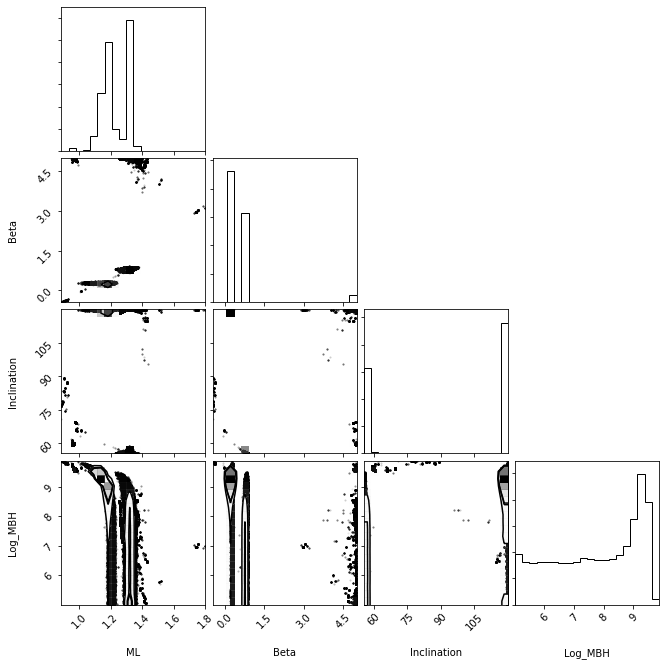

In [8]:
#Corner plots

labels = ["ML", "Beta", "Inclination", "Log_MBH"]

tau = read.get_autocorr_time(tol=0)
print(tau)
samples = read.get_chain(discard = 300, flat=True)
log_prob_samples = read.get_log_prob(discard = 300, flat=True)


print("flat chain shape: {0}".format(samples.shape))
print("flat log prob shape: {0}".format(log_prob_samples.shape))

all_samples = np.concatenate(
    (samples, log_prob_samples[:, None]), axis=1
)

labels += ["log prob"]

corner.corner(samples, labels=labels);

In [7]:
tau = read.get_autocorr_time()

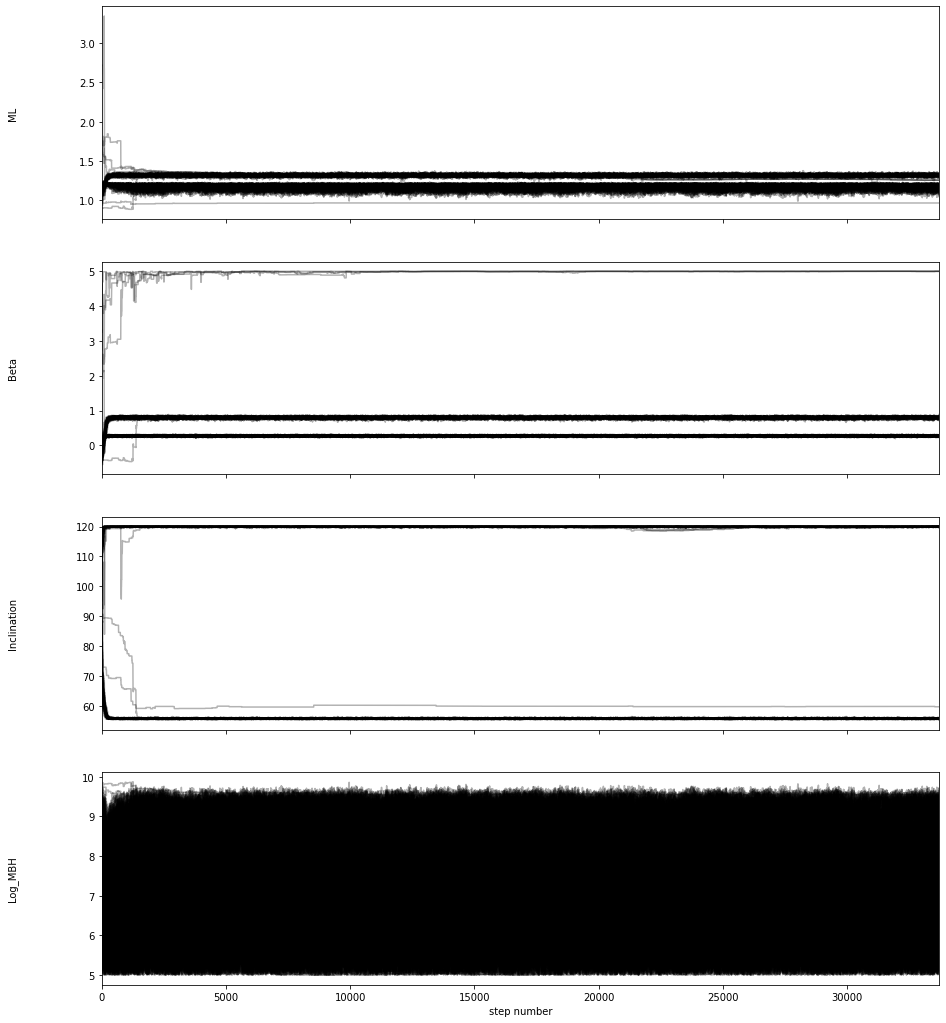

In [13]:
#Walke of each walker
fig, axes = plt.subplots(len(labels)-1, figsize=(15, 18), sharex=True)
samples = read.get_chain()

for i in range(len(labels)-1):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [10]:
it, accep_tot, time, accep_100 = np.loadtxt("Output_LogFile.txt", unpack=True)

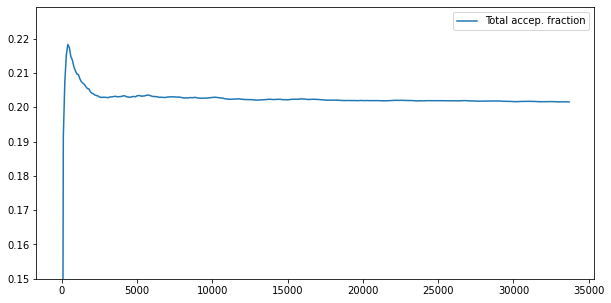

In [11]:
#Plot accep_tot vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_tot, label="Total accep. fraction")
plt.ylim(0.15,)
plt.legend()

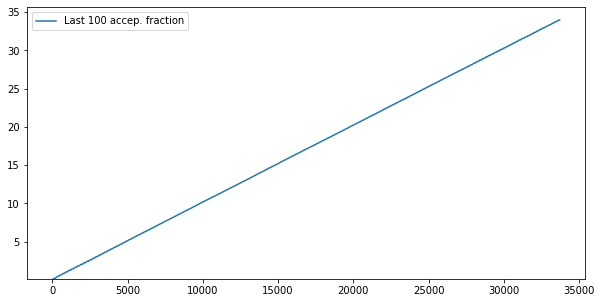

In [14]:
#Plot accep_100 vs it
plt.figure(figsize=(10,5))

plt.plot(it, accep_100, label="Last 100 accep. fraction")
plt.ylim(0.15,)
plt.legend()